In [45]:
import pandas as pd
import datetime as dt
import bottleneck as bn

In [44]:
!pip install bottleneck

In [10]:
dataset = pd.read_csv('united_states_of_america_maize_s1.csv')
dataset.head()

,Unnamed: 0,index,datetime,adm0_name,adm1_name,str_ID,Year,JD,crop_cal,yield,...,Month,Day,abbr_months,name_months,Season,perc_season,GDD,cGDD,cNDVI,AMIS
0,0,2000-01-01,2000-01-01,united_states_of_america,alabama,188001000.0,2000.0,1.0,0.0,NaN,...,1.0,1.0,Jan,January,NaN,NaN,5.541754,NaN,NaN,Southeast
1,1,2000-01-02,2000-01-02,united_states_of_america,alabama,188001000.0,2000.0,2.0,0.0,NaN,...,1.0,2.0,Jan,January,NaN,NaN,6.152188,NaN,NaN,Southeast
2,2,2000-01-03,2000-01-03,united_states_of_america,alabama,188001000.0,2000.0,3.0,0.0,NaN,...,1.0,3.0,Jan,January,NaN,NaN,10.842817,NaN,NaN,Southeast
3,3,2000-01-04,2000-01-04,united_states_of_america,alabama,188001000.0,2000.0,4.0,0.0,NaN,...,1.0,4.0,Jan,January,NaN,NaN,4.109872,NaN,NaN,Southeast
4,4,2000-01-05,2000-01-05,united_states_of_america,alabama,188001000.0,2000.0,5.0,0.0,NaN,...,1.0,5.0,Jan,January,NaN,NaN,0.000000,NaN,NaN,Southeast


In [11]:
dataset.shape

(260610, 62)

In [12]:
dataset.columns

Index(['Unnamed: 0', 'index', 'datetime', 'adm0_name', 'adm1_name', 'str_ID',
       'Year', 'JD', 'crop_cal', 'yield', 'production', 'tot_pix', 'mean_crop',
       'med_crop', 'min_crop', 'max_crop', 'ndvi', 'ndvi_tot_pix',
       'ndvi_wa_crop', 'ndvi_wmed_crop', 'ndvi_min_crop', 'ndvi_max_crop',
       'cpc_tmin', 'cpc_tmin_tot_pix', 'cpc_tmin_wa_crop',
       'cpc_tmin_wmed_crop', 'cpc_tmin_min_crop', 'cpc_tmin_max_crop',
       'cpc_tmax', 'cpc_tmax_tot_pix', 'cpc_tmax_wa_crop',
       'cpc_tmax_wmed_crop', 'cpc_tmax_min_crop', 'cpc_tmax_max_crop',
       'chirps', 'chirps_tot_pix', 'chirps_wa_crop', 'chirps_wmed_crop',
       'chirps_min_crop', 'chirps_max_crop', 'esi_4wk', 'esi_4wk_tot_pix',
       'esi_4wk_wa_crop', 'esi_4wk_wmed_crop', 'esi_4wk_min_crop',
       'esi_4wk_max_crop', 'soil_moisture_as1', 'soil_moisture_as1_tot_pix',
       'soil_moisture_as1_wa_crop', 'soil_moisture_as1_wmed_crop',
       'soil_moisture_as1_min_crop', 'soil_moisture_as1_max_crop', 'Month',
     

In [13]:
dataset.datetime.dtypes

dtype('O')

In [14]:
dataset = dataset.drop('Unnamed: 0',axis=1)

In [15]:

dataset['datetime'] = pd.to_datetime(dataset['datetime'],format='%Y-%m-%d')
dataset['Year'] = dataset['Year'].astype(int)
dataset['Month'] = dataset['Month'].astype(int)
dataset['Day'] = dataset['Day'].astype(int)
dataset.head()

,index,datetime,adm0_name,adm1_name,str_ID,Year,JD,crop_cal,yield,production,...,Month,Day,abbr_months,name_months,Season,perc_season,GDD,cGDD,cNDVI,AMIS
0,2000-01-01,2000-01-01,united_states_of_america,alabama,188001000.0,2000,1.0,0.0,NaN,272415.0,...,1,1,Jan,January,NaN,NaN,5.541754,NaN,NaN,Southeast
1,2000-01-02,2000-01-02,united_states_of_america,alabama,188001000.0,2000,2.0,0.0,NaN,272415.0,...,1,2,Jan,January,NaN,NaN,6.152188,NaN,NaN,Southeast
2,2000-01-03,2000-01-03,united_states_of_america,alabama,188001000.0,2000,3.0,0.0,NaN,272415.0,...,1,3,Jan,January,NaN,NaN,10.842817,NaN,NaN,Southeast
3,2000-01-04,2000-01-04,united_states_of_america,alabama,188001000.0,2000,4.0,0.0,NaN,272415.0,...,1,4,Jan,January,NaN,NaN,4.109872,NaN,NaN,Southeast
4,2000-01-05,2000-01-05,united_states_of_america,alabama,188001000.0,2000,5.0,0.0,NaN,272415.0,...,1,5,Jan,January,NaN,NaN,0.000000,NaN,NaN,Southeast


In [16]:
# Generate a dataframe that has crop_cal values in range [1,2,3]
cropCalDF = dataset[dataset['crop_cal'].isin([1.0,2.0,3.0])]
cropCalDF.head()

,index,datetime,adm0_name,adm1_name,str_ID,Year,JD,crop_cal,yield,production,...,Month,Day,abbr_months,name_months,Season,perc_season,GDD,cGDD,cNDVI,AMIS
73,2000-03-15,2000-03-15,united_states_of_america,alabama,188001000.0,2000,74.0,1.0,4.08,272415.0,...,3,15,Mar,March,2000.0,14.285714,7.385429,7.385429,143.078520,Southeast
74,2000-03-16,2000-03-16,united_states_of_america,alabama,188001000.0,2000,75.0,1.0,4.08,272415.0,...,3,16,Mar,March,2000.0,14.285714,7.022785,14.408214,286.683537,Southeast
75,2000-03-17,2000-03-17,united_states_of_america,alabama,188001000.0,2000,76.0,1.0,4.08,272415.0,...,3,17,Mar,March,2000.0,14.285714,3.083495,17.491709,430.815052,Southeast
76,2000-03-18,2000-03-18,united_states_of_america,alabama,188001000.0,2000,77.0,1.0,4.08,272415.0,...,3,18,Mar,March,2000.0,14.285714,4.650109,22.141818,575.473065,Southeast
77,2000-03-19,2000-03-19,united_states_of_america,alabama,188001000.0,2000,78.0,1.0,4.08,272415.0,...,3,19,Mar,March,2000.0,14.285714,2.485188,24.627006,720.657575,Southeast


In [17]:
"""  
    The requirement is to get the  average mean values of
    any particular variable, for a given date. We calculated 
    average mean of years in the past.The function segments the
    original dataset based on state first and then day and Month,
    then get the dates in the year range. Calculate average mean 
    of the selected column and return to the user
"""
def climatology(col_name,state,date,noYear):
    state = state.lower()
#     inMon = date.dt.month
#     inDay = date.dt.day
#     inyear = date.dt.year
    inMon = date.month
    inDay = date.day
    inyear = date.year
    pastyear = inyear-noYear
    try:
        byState = cropCalDF[cropCalDF.adm1_name == state]

        byDate = byState[(byState.Day == inDay)& (byState.Month == inMon) & 
                         ((byState.Year<=inyear)&(byState.Year>pastyear))]
        if byDate.empty :
            raise Exception('No data found for this date')
        byColumn = byDate[col_name].mean()
        return byColumn
    except Exception as e:
        print(e)
    
    


C:\Users\sumed\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


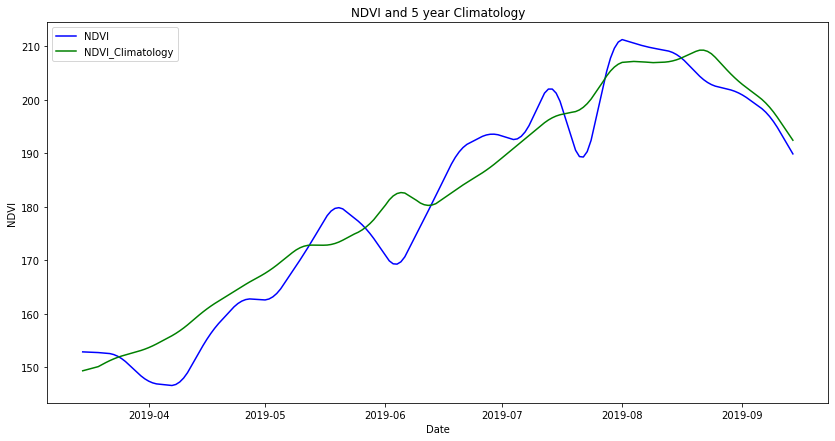

In [53]:
# def graphics(state,year):
import matplotlib.pyplot as plt
import seaborn as sns
cropcal = cropCalDF.copy()
current_time =cropCalDF[(cropCalDF.adm1_name == 'alabama') & (cropCalDF.Year == 2019)]
new_val = [climatology('ndvi','alabama',date,5) for date in current_time.datetime]

current_time['ndvi_climatology'] = new_val

rm_ndvi = bn.move_mean(current_time.ndvi,window=5,min_count=1)
rmc_ndvi = bn.move_mean(current_time.ndvi_climatology,window=5,min_count=1)
plt.figure(figsize=(14,7))

# plt.plot(current_time.datetime,current_time.ndvi,color='blue',label='ndvi',linestyle='dashed')
plt.plot(current_time.datetime,rm_ndvi,'b',label="NDVI")
# plt.plot(current_time.datetime,current_time.ndvi_climatology,color='green',label='ndvi_climatology',linestyle='dashed')
plt.plot(current_time.datetime,rmc_ndvi,'g',label="NDVI_Climatology")
plt.title("NDVI and 5 year Climatology")
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.legend()

plt.show()


In [ ]:
# Test dataset

new_date = dt.datetime.strptime('12-02-2015','%d-%m-%Y')
print(type(new_date))
print(type(new_date.month))
state='alabama'
years=5
column='ndvi'
print(type(new_date))
avg_mean = climatology(column,state,new_date,years)
print('The Calculated Avg for '+str(years)+' years is: '+str(avg_mean))
